<a href="https://colab.research.google.com/drive/1DHqYWnrO5R6BH0ajg7oyTF8pQVT2MR1Q#scrollTo=qRmqcnp7GT9E" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plotando um Scatter Plot com brasão dos times da Libertadores 23 - 4ª Rodada

 Vamos criar um gráfico de dispersão dos times xG(Expected Goals) e xGA(Expected Goals Against), mas com os logotipos dos clubes representando cada um.

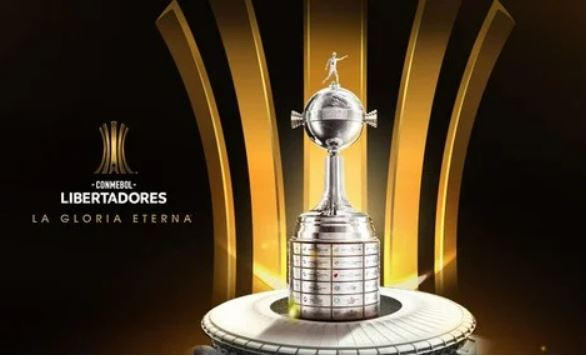

In [1]:
#Importando as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Conectando o Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Carregando o arquivo Excel
excel_file = pd.ExcelFile('/content/drive/MyDrive/data_sets/futebol/scatter_plot/libertadores.xlsx')

# Obtendo os nomes de todas as abas
sheet_names = excel_file.sheet_names

# Exibindo os nomes das abas
for sheet_name in sheet_names:
    print(sheet_name)

Group H Table
Group G Table
Group F Table
Group D Table
Group E Table
Group C Table
Group B Table
Group A Table


In [4]:
# Lendo as abas do arquivo Excel
ga = pd.read_excel('/content/drive/MyDrive/data_sets/futebol/scatter_plot/libertadores.xlsx', sheet_name='Group A Table')
gb = pd.read_excel('/content/drive/MyDrive/data_sets/futebol/scatter_plot/libertadores.xlsx', sheet_name='Group B Table')
gc = pd.read_excel('/content/drive/MyDrive/data_sets/futebol/scatter_plot/libertadores.xlsx', sheet_name='Group C Table')
gd = pd.read_excel('/content/drive/MyDrive/data_sets/futebol/scatter_plot/libertadores.xlsx', sheet_name='Group D Table')
ge = pd.read_excel('/content/drive/MyDrive/data_sets/futebol/scatter_plot/libertadores.xlsx', sheet_name='Group E Table')
gf = pd.read_excel('/content/drive/MyDrive/data_sets/futebol/scatter_plot/libertadores.xlsx', sheet_name='Group F Table')
gg = pd.read_excel('/content/drive/MyDrive/data_sets/futebol/scatter_plot/libertadores.xlsx', sheet_name='Group G Table')
gh = pd.read_excel('/content/drive/MyDrive/data_sets/futebol/scatter_plot/libertadores.xlsx', sheet_name='Group H Table')

In [5]:
#Juntar todas as abas
from openpyxl import load_workbook
# Ler o arquivo Excel
arquivo = pd.ExcelFile('/content/drive/MyDrive/data_sets/futebol/scatter_plot/libertadores.xlsx')
# Liste as abas disponíveis
sheet_names = arquivo.sheet_names
# Crie um DataFrame vazio
merged_data = pd.DataFrame()

for sheet_name in sheet_names:
    # Leia a aba atual
    df = excel_file.parse(sheet_name)
    
    # Adicione os dados ao DataFrame consolidado
    merged_data = merged_data.append(df, ignore_index=True)

# Salve o DataFrame consolidado em um novo arquivo Excel
merged_data.to_excel('arquivo_consolidado.xlsx', index=True)


In [6]:
df_liberta = pd.read_excel('/content/arquivo_consolidado.xlsx')
df_liberta.head()

,Unnamed: 0,Cl,Equipe,MP,V,E,D,GP,GC,GD,Pt,xG,xGA,xGD,xGD/90,Últimos 5,Notas
0,0,1,co Nacional,4,3,1,0,8,4,4,10,71,51,20,0.50,V_x000D_\n _x000D_\nD_x000D_\n _x000D_\nE_x000...,NaN
1,1,2,py Olimpia,4,2,2,0,6,3,3,8,75,58,16,0.41,D_x000D_\n _x000D_\nE_x000D_\n _x000D_\nE_x000...,NaN
2,2,3,ar Patronato,4,1,0,3,5,6,-1,3,36,60,-24,-0.59,V_x000D_\n _x000D_\nD_x000D_\n _x000D_\nD_x000...,NaN
3,3,4,pe Melgar,4,0,1,3,3,9,-6,1,52,65,-13,-0.31,E_x000D_\n _x000D_\nV_x000D_\n _x000D_\nD_x000...,NaN
4,4,1,br Atl Paranaense,4,2,1,1,5,4,1,7,51,60,-9,-0.23,V_x000D_\n _x000D_\nV_x000D_\n _x000D_\nV_x000...,NaN


In [7]:
#Limpando os dados
df_liberta = df_liberta.drop(['Unnamed: 0', 'Cl' , 'xGD/90' , 'Últimos 5' , 'Notas' ], axis=1)

In [8]:
#Corrigindo os nomes dos times
nome_coluna = 'Equipe'
num_letras = 3

# Loop para corrigir os nomes nas linhas
for index, row in df_liberta.iterrows():
    valor_atual = row[nome_coluna]
    novo_valor = valor_atual[num_letras:].strip()
    df_liberta.at[index, nome_coluna] = novo_valor

In [9]:
#Verificar o novo DF consolidado
df_liberta

,Equipe,MP,V,E,D,GP,GC,GD,Pt,xG,xGA,xGD
0,Nacional,4,3,1,0,8,4,4,10,71,51,20
1,Olimpia,4,2,2,0,6,3,3,8,75,58,16
2,Patronato,4,1,0,3,5,6,-1,3,36,60,-24
3,Melgar,4,0,1,3,3,9,-6,1,52,65,-13
4,Atl Paranaense,4,2,1,1,5,4,1,7,51,60,-9
5,Atlético Mineiro,4,2,0,2,5,4,1,6,96,25,71
6,Libertad,4,2,0,2,5,5,0,6,46,41,5
7,Alianza Lima,4,1,1,2,3,5,-2,4,24,91,-67
8,Boca Juniors,4,2,1,1,4,2,2,7,38,33,5
9,Pereira,4,2,1,1,5,4,1,7,58,34,25


In [10]:
#Corrigindo alguns nomes de times
df_liberta.iloc[0, 0] = df_liberta.iloc[0, 0].replace('Nacional', 'Atlético Nacional')
df_liberta.iloc[9,0] = df_liberta.iloc[9,0].replace('Pereira', 'Deportivo Pereira')
df_liberta.iloc[25,0] = df_liberta.iloc[25,0].replace('Independiente', 'Independiente Medelin')
df_liberta.iloc[17,0] = df_liberta.iloc[17,0].replace('Independiente', 'Independiente Del Valle')

In [11]:
df_liberta

,Equipe,MP,V,E,D,GP,GC,GD,Pt,xG,xGA,xGD
0,Atlético Nacional,4,3,1,0,8,4,4,10,71,51,20
1,Olimpia,4,2,2,0,6,3,3,8,75,58,16
2,Patronato,4,1,0,3,5,6,-1,3,36,60,-24
3,Melgar,4,0,1,3,3,9,-6,1,52,65,-13
4,Atl Paranaense,4,2,1,1,5,4,1,7,51,60,-9
5,Atlético Mineiro,4,2,0,2,5,4,1,6,96,25,71
6,Libertad,4,2,0,2,5,5,0,6,46,41,5
7,Alianza Lima,4,1,1,2,3,5,-2,4,24,91,-67
8,Boca Juniors,4,2,1,1,4,2,2,7,38,33,5
9,Deportivo Pereira,4,2,1,1,5,4,1,7,58,34,25


In [12]:
#Criando a coluna com o nome do brasão
df_liberta['path'] = df_liberta['Equipe'] + '.png'
df = df_liberta

In [13]:
#Nome dos time
df['Equipe']

0           Atlético Nacional
1                     Olimpia
2                   Patronato
3                      Melgar
4              Atl Paranaense
5            Atlético Mineiro
6                    Libertad
7                Alianza Lima
8                Boca Juniors
9           Deportivo Pereira
10                  Colo-Colo
11                    Monagas
12                 Fluminense
13              The Strongest
14           Sporting Cristal
15                River Plate
16             Argentinos Jun
17    Independiente Del Valle
18                Corinthians
19                  Liverpool
20                    Bolívar
21                  Palmeiras
22               Barcelona SC
23              Cerro Porteño
24              Internacional
25      Independiente Medelin
26                   Nacional
27             Metropolitanos
28                Racing Club
29                   Flamengo
30                   Ñublense
31                   SD Aucas
Name: Equipe, dtype: object

In [14]:
df

,Equipe,MP,V,E,D,GP,GC,GD,Pt,xG,xGA,xGD,path
0,Atlético Nacional,4,3,1,0,8,4,4,10,71,51,20,Atlético Nacional.png
1,Olimpia,4,2,2,0,6,3,3,8,75,58,16,Olimpia.png
2,Patronato,4,1,0,3,5,6,-1,3,36,60,-24,Patronato.png
3,Melgar,4,0,1,3,3,9,-6,1,52,65,-13,Melgar.png
4,Atl Paranaense,4,2,1,1,5,4,1,7,51,60,-9,Atl Paranaense.png
5,Atlético Mineiro,4,2,0,2,5,4,1,6,96,25,71,Atlético Mineiro.png
6,Libertad,4,2,0,2,5,5,0,6,46,41,5,Libertad.png
7,Alianza Lima,4,1,1,2,3,5,-2,4,24,91,-67,Alianza Lima.png
8,Boca Juniors,4,2,1,1,4,2,2,7,38,33,5,Boca Juniors.png
9,Deportivo Pereira,4,2,1,1,5,4,1,7,58,34,25,Deportivo Pereira.png


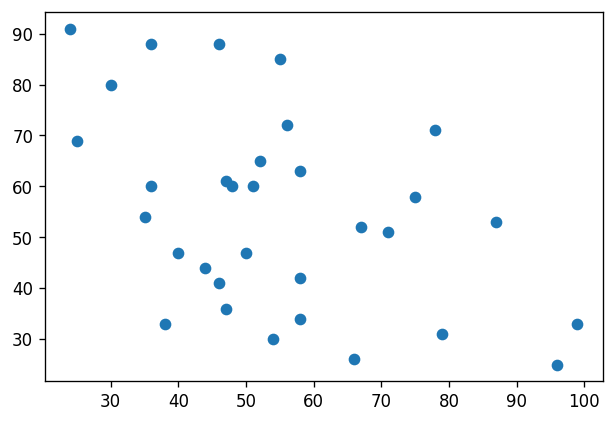

In [15]:
#Plotar o gráfico de dispersão
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(df['xG'], df['xGA'])

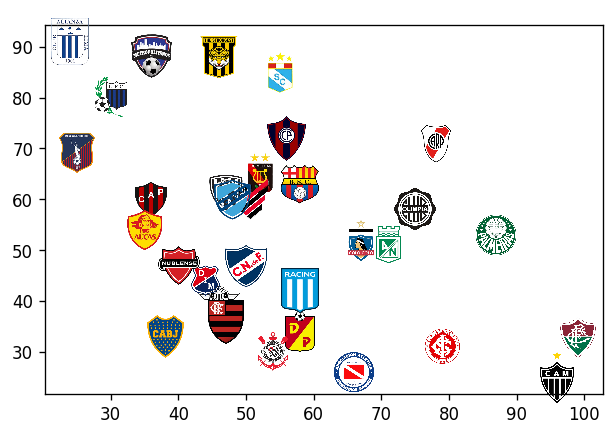

In [16]:
#Adcionando os brasões ao ploter
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(df['xG'], df['xGA'], color='white')
img ='/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_liberta/' #local onde estão os brasões
def getImage(path):
    return OffsetImage(plt.imread(img + path), zoom=.05, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['xG'], row['xGA']), frameon=False)
    ax.add_artist(ab)

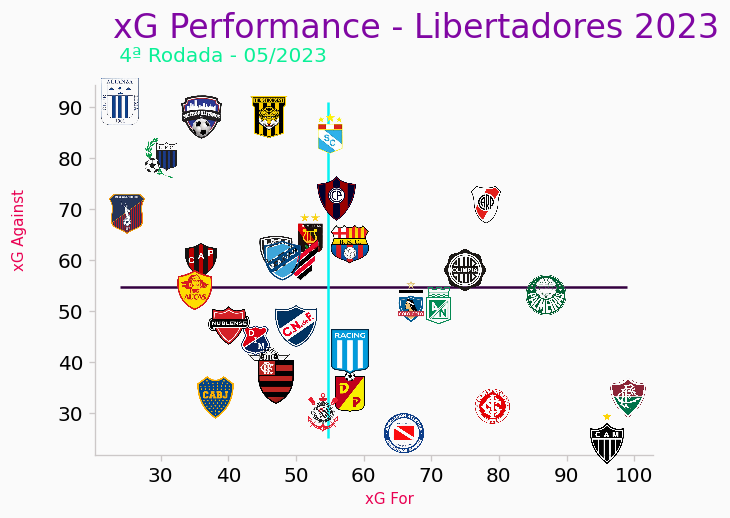

In [17]:
#Personalizando o gráfico
# Definir fonte e cor de fundo
plt.rcParams.update({'font.monospace':'Courier'})
bgcol = '#fafafa'

# Create initial plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df['xG'], df['xGA'], c=bgcol)

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
img ='/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_liberta/' #local onde estão os brasões
def getImage(path):
    return OffsetImage(plt.imread(img + path), zoom=.05, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['xG'], row['xGA']), frameon=False)
    ax.add_artist(ab)

# Add average lines
plt.hlines(df['xGA'].mean(), df['xG'].min(), df['xG'].max(), color='#340040')
plt.vlines(df['xG'].mean(), df['xGA'].min(), df['xGA'].max(), color='#07F2F2')

# Text

## Title & comment
fig.text(.15,.98,'xG Performance - Libertadores 2023' ,size=20, color='#8007A3')
fig.text(.15,.93,' 4ª Rodada - 05/2023', size=12, color='#0AF097')

## Avg line explanation
fig.text(.01,.50,'xG Against', size=9, color='#e90052',rotation=90)
fig.text(.50,0.01,'xG For', size=9, color='#e90052')

## Save plot
plt.savefig('xGChart.png', dpi=1200, bbox_inches = "tight")

# Análise 

🌟 Excelente rodada na Libertadores! O Atlético está em forte recuperação tanto na competição continental quanto no Brasileirão. O trabalho de Eduardo Coudet tem sido fundamental para estabelecer um padrão de jogo consistente para o Galo, com muita posse de bola e presença constante na área adversária, sem sofrer grandes sustos defensivos.

Além disso, o Fluminense também vem apresentando um desempenho sólido na Libertadores, tanto no ataque quanto na defesa. Enquanto isso, o Palmeiras tem enfrentado alguns desafios, mas continua criando muitas chances de gol.

É inspirador ver a hegemonia dos clubes brasileiros se manter forte em 2023. Estamos presenciando um futebol de alto nível e torcendo por mais conquistas nas competições. Vamos em frente, Brasil! 🇧🇷⚽️ #FutebolBrasileiro #Libertadores2023